# Avocado Case Study

## Data description

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

This dataset contains 18249 rows and 14 columns.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
# Dimension of the Dataset
df.shape

(18249, 14)

* This dataset contains 16468 rows and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# Statistical Summary
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Now we are going to check the null values of the dataset.

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* 0 indicates the absence of NaN values.

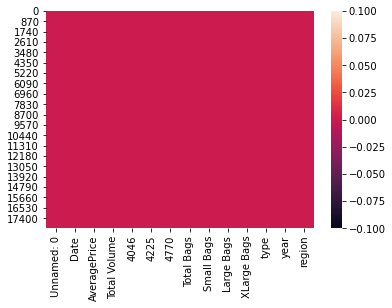

In [9]:
sns.heatmap(df.isnull())

* There are no NaN values in the dataset.

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
df.select_dtypes('object').columns

Index(['Date', 'type', 'region'], dtype='object')

## Data Visualization

### Univariate Analysis of categoric variables

In [12]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

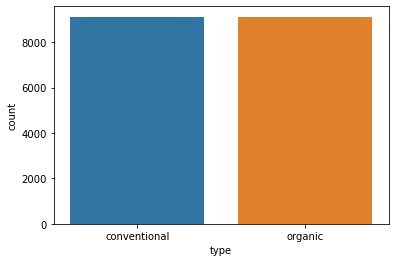

In [13]:
sns.countplot(df['type'])

* There are two types of avocados,conventional and organic.both are almost equally distributed.

In [14]:
df['region'].value_counts()

Detroit                338
Jacksonville           338
HartfordSpringfield    338
TotalUS                338
California             338
Charlotte              338
SanDiego               338
Orlando                338
HarrisburgScranton     338
Albany                 338
Indianapolis           338
BaltimoreWashington    338
Houston                338
Denver                 338
CincinnatiDayton       338
Southeast              338
Portland               338
Roanoke                338
Nashville              338
DallasFtWorth          338
RichmondNorfolk        338
BuffaloRochester       338
Boston                 338
SouthCarolina          338
LosAngeles             338
Spokane                338
Louisville             338
PhoenixTucson          338
Boise                  338
Plains                 338
Chicago                338
NewYork                338
Seattle                338
Midsouth               338
Syracuse               338
Tampa                  338
NewOrleansMobile       338
W

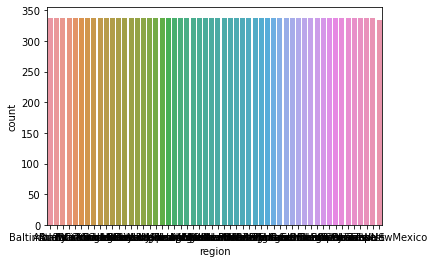

In [15]:
sns.countplot(df['region'])

plt.show()

* The features contains 54 unique values and are distributed perfectly through the dataset.

* For the mechine learning purposes the data could be transformed with OneHotEncoder formula.

* This data is helpful to analyse price behaviour and quantity sold in each region.

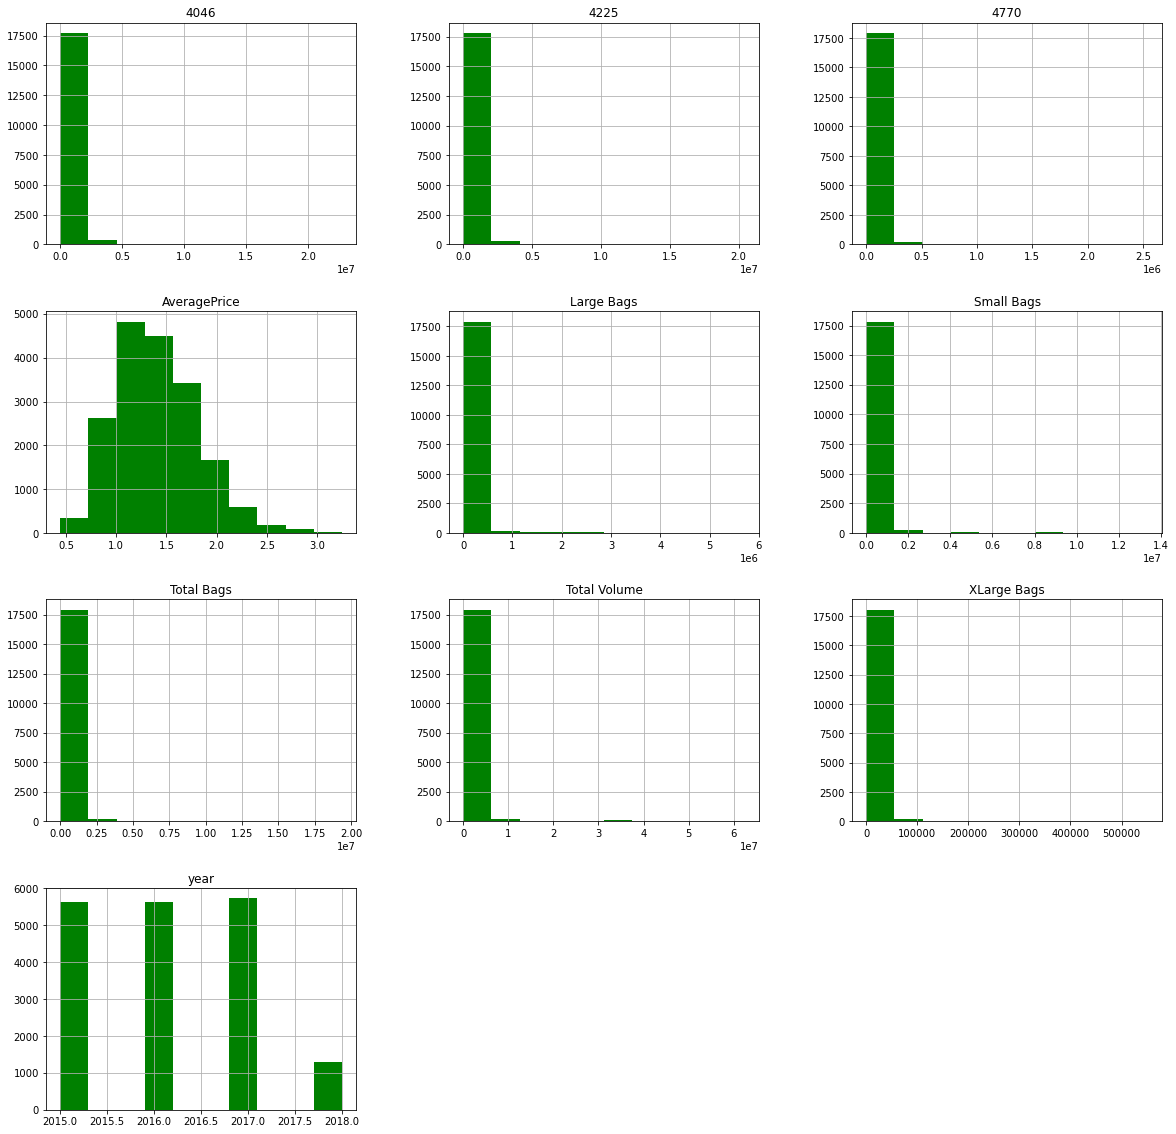

In [16]:
df.hist(figsize=(20,20),color='g')
plt.show()

* The avocados with the code 4046 sold more than 4224 and 4770

* The distribution of AveragePrice is like normal distribution.but little right skewed.

* Among the small, large and xlarge bags, small bags sold more.

* Sale of avocado was more in the year 2017.but sale was too low in the year 2018.

## Bivariate Analysis

In [17]:
var=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']

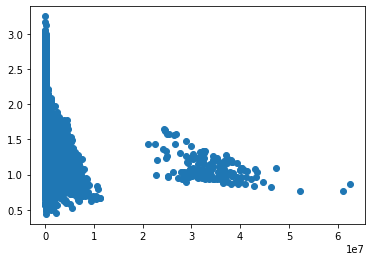

In [18]:
plt.scatter(df['Total Volume'],df['AveragePrice'])
plt.show()

* We can observe that in some points with the volume average price also increases. but in some points,price is minimum.

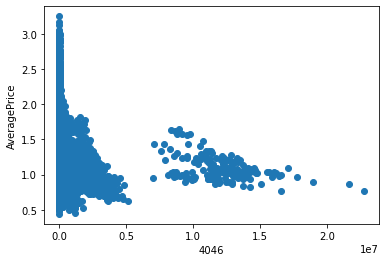

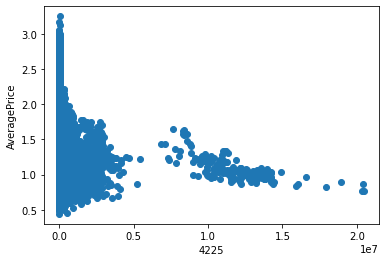

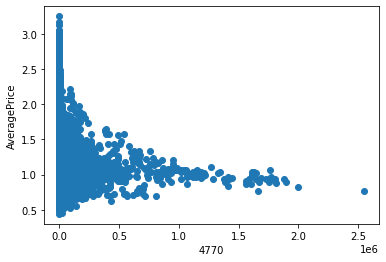

In [19]:
list=['4046','4225','4770']
for i in list:
    plt.scatter(df[i],df['AveragePrice'])
    plt.xlabel(i)
    plt.ylabel('AveragePrice')
    plt.show()

* There is no positive relationship between x and y.

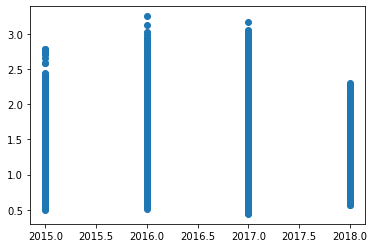

In [20]:
plt.scatter(df['year'],df['AveragePrice'])
plt.show()

* We can infer that ,in the year 2016 average price is maximum.but minimum in 2018.

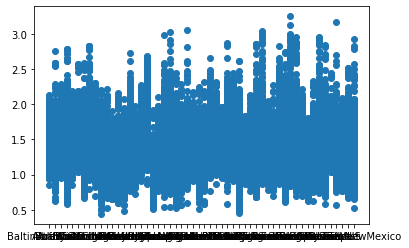

In [21]:
plt.scatter(df['region'],df['AveragePrice'])
plt.show()

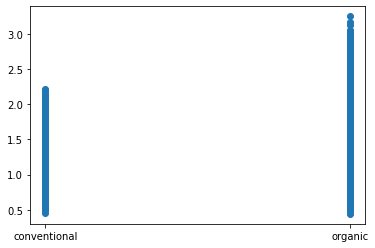

In [22]:
plt.scatter(df['type'],df['AveragePrice'])
plt.show()

* Average price of organic avocados are higher than conventional.But from the value counts it is clear that conventional avocados sold more than organic.so we can infer that oraganic avacados are more costly than conventional

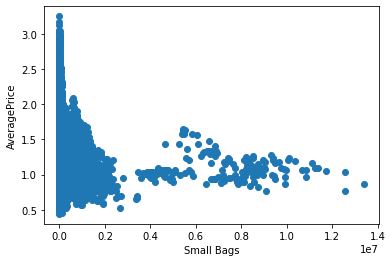

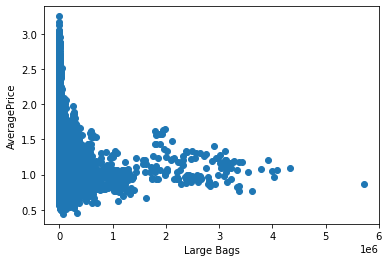

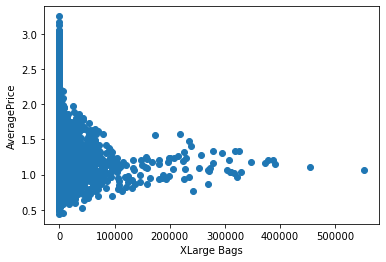

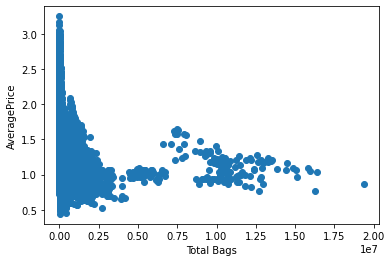

In [23]:
list=['Small Bags','Large Bags','XLarge Bags','Total Bags']

for i in list:
    plt.scatter(df[i],df['AveragePrice'])
    plt.xlabel(i)
    plt.ylabel("AveragePrice")
    plt.show()

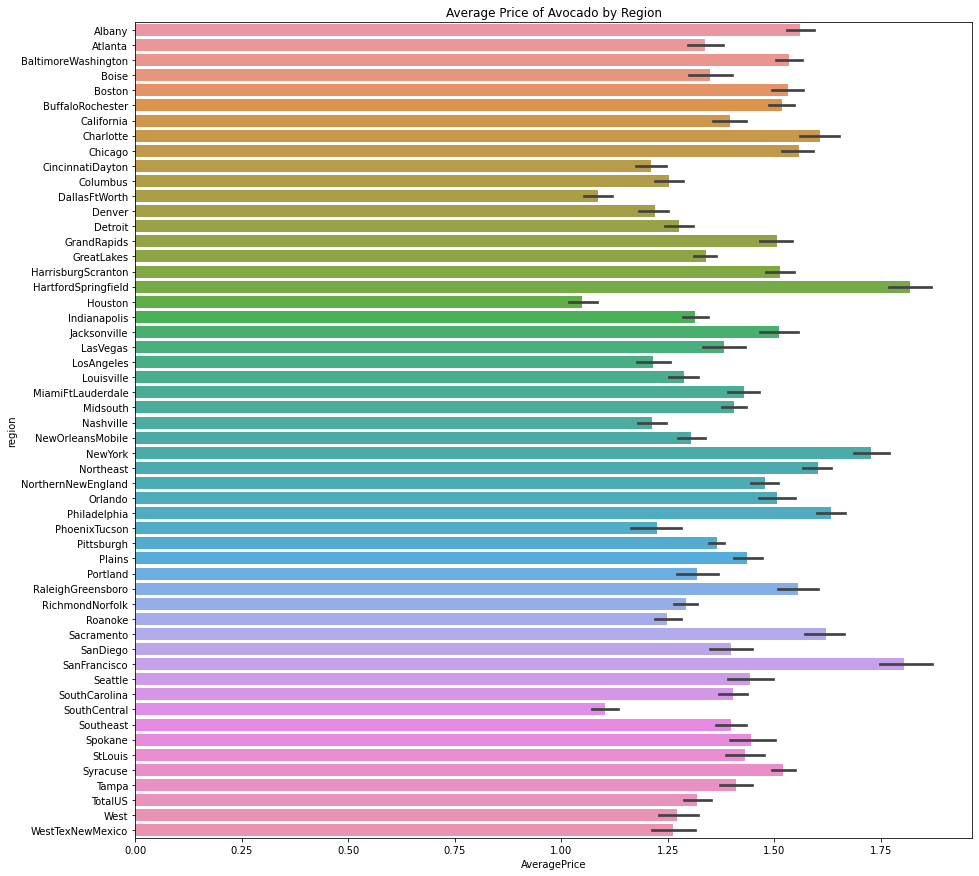

In [24]:
plt.figure(figsize=(15,15))
plt.title('Average Price of Avocado by Region')
sns.barplot(x='AveragePrice',y='region',data=df)
plt.show()

* Average price is maximum in HartfordSpringfield and minimum at Houston.

## Multivariate analysis

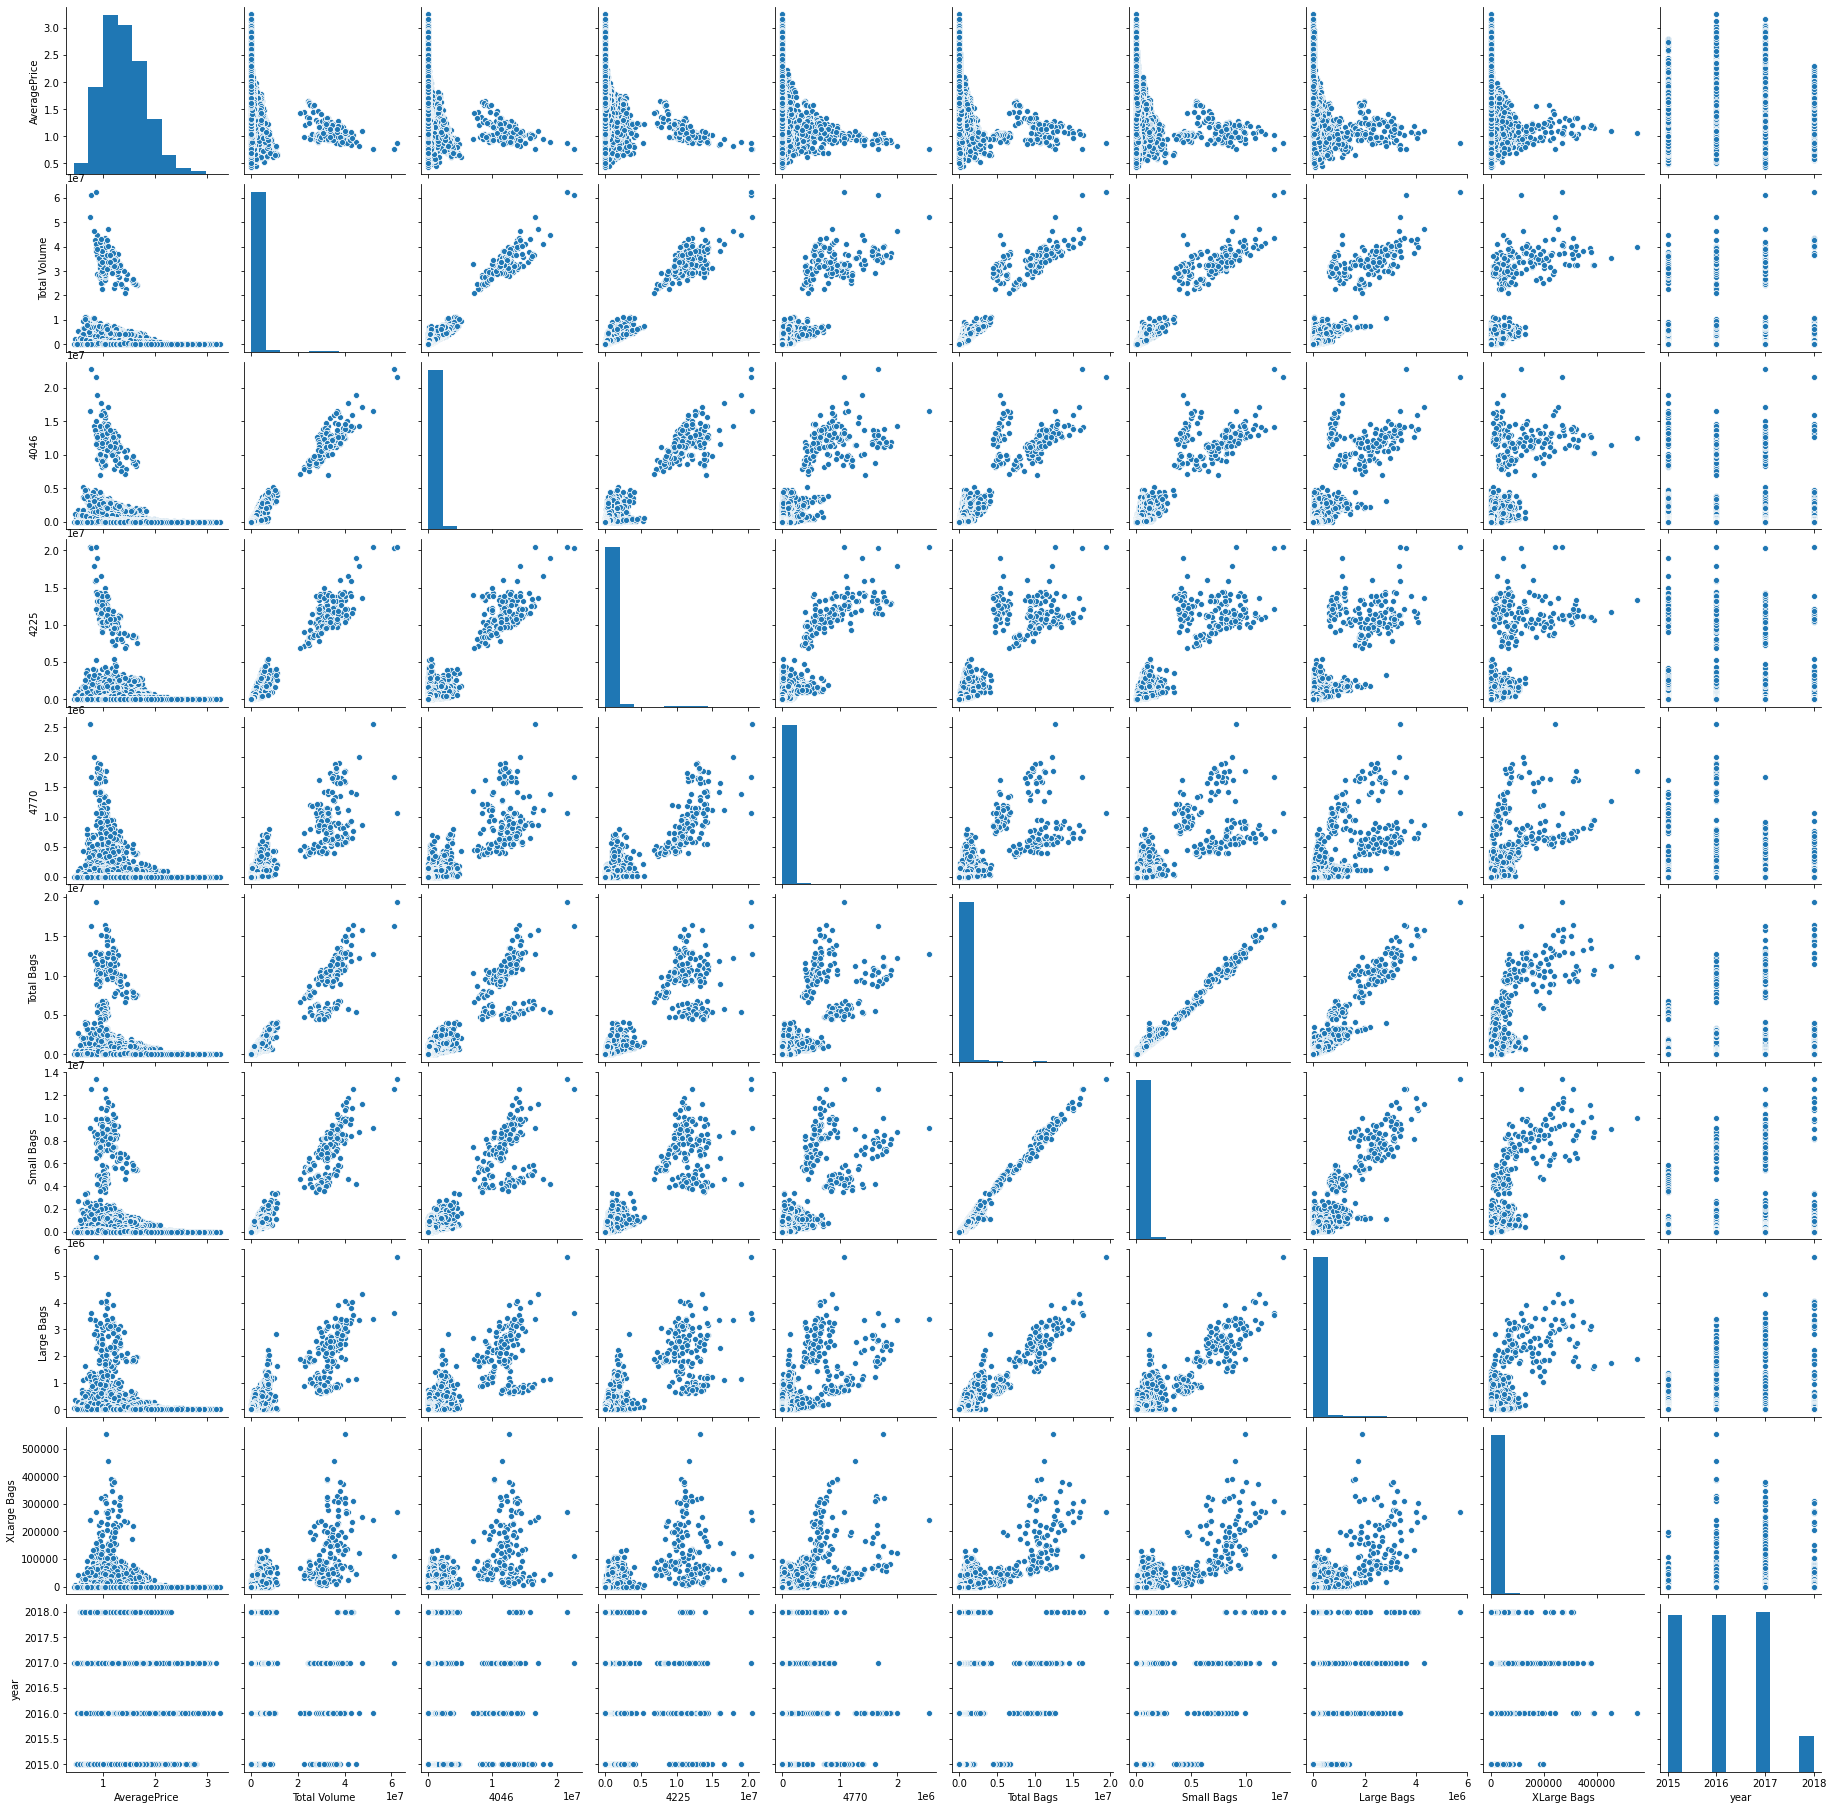

In [25]:
sns.pairplot(df)
plt.show()

### Conclusions from the graph

* Sale of Large Bags maximum in the year 2018 and minimum in2015.

* Sale of XLarge bags maximum in the year 2016.and minimum at 2015.

* Sale of Small Bags maximum in the year 2018.minimum in 2015.

* Sale of Total bags are also maximum in the year 2018.

In [26]:
df.drop('Date',axis=1,inplace=True)

## Checking the Correlation

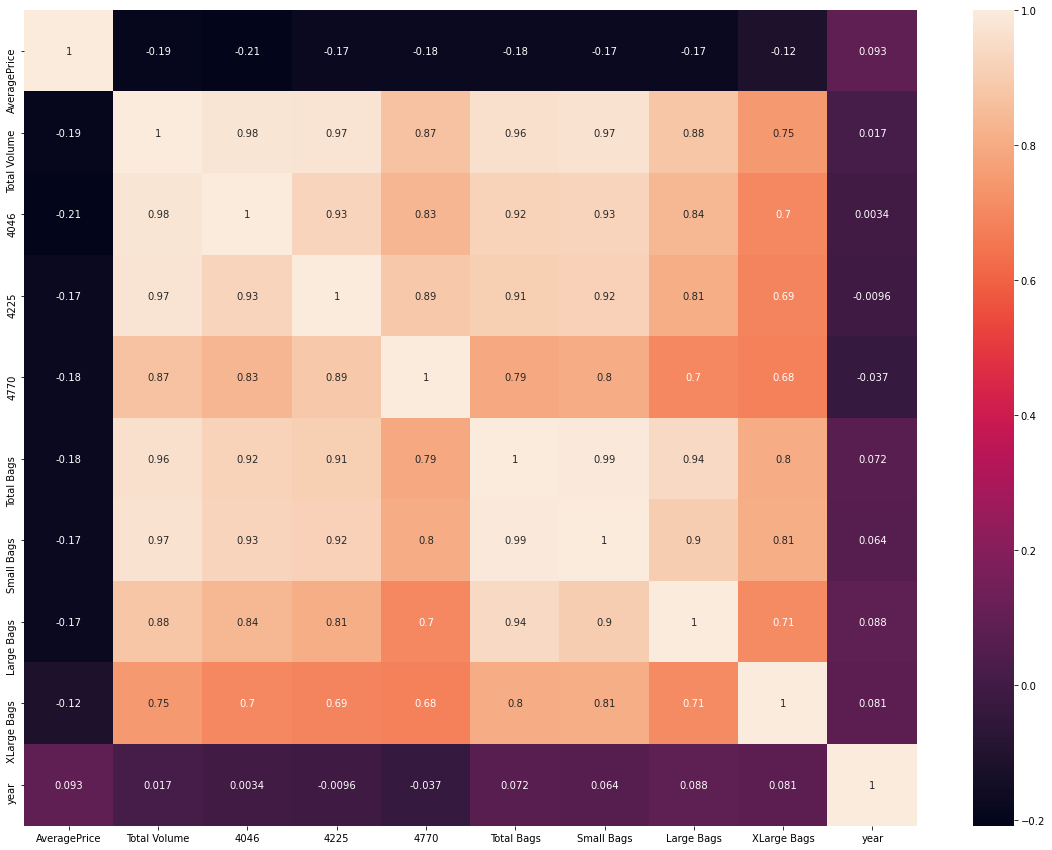

In [27]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

* The variable type have strong correlation with the taeget variable AveragePrice. 

* Small bags,large bags and xlarge bags have strong correlation with the variable Total Volume.among these bags, Small Baga have strong correlation than other bags.

## Converting categorical variable to numeric variable

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
list=['type','region']
for i in list:
    df[i]=le.fit_transform(df[i])

In [31]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [32]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

### Checking Outliers

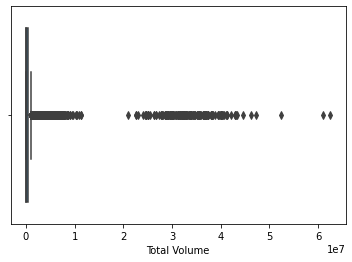

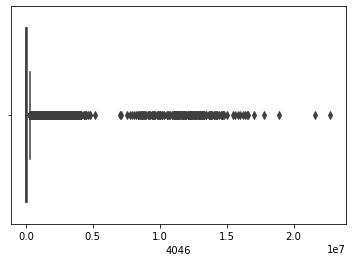

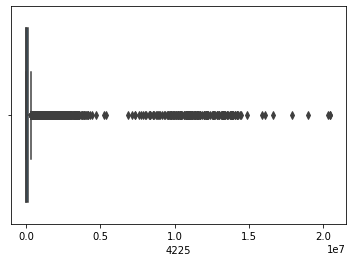

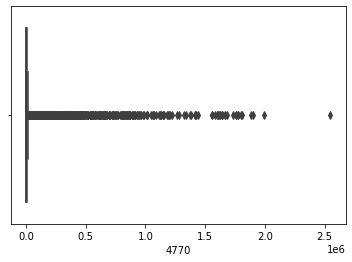

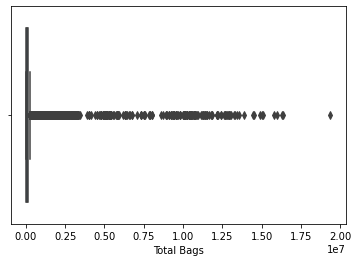

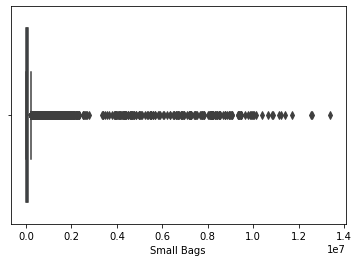

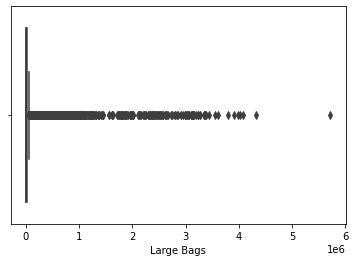

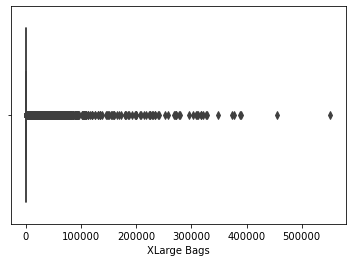

In [33]:
for i in ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']:
    
    sns.boxplot(df[i])
    plt.show()
    


In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [35]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]

In [37]:
df=df_new

In [38]:
df.shape

(17651, 12)

### Distribution of data along all columns.

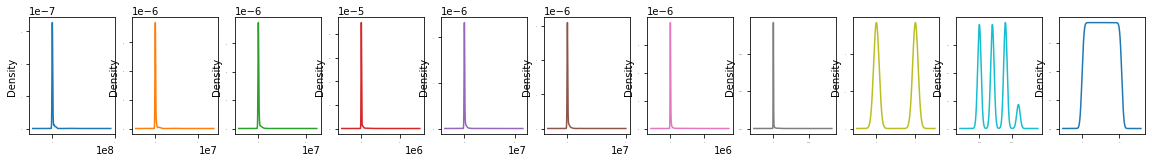

In [39]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(20,15))
plt.show()

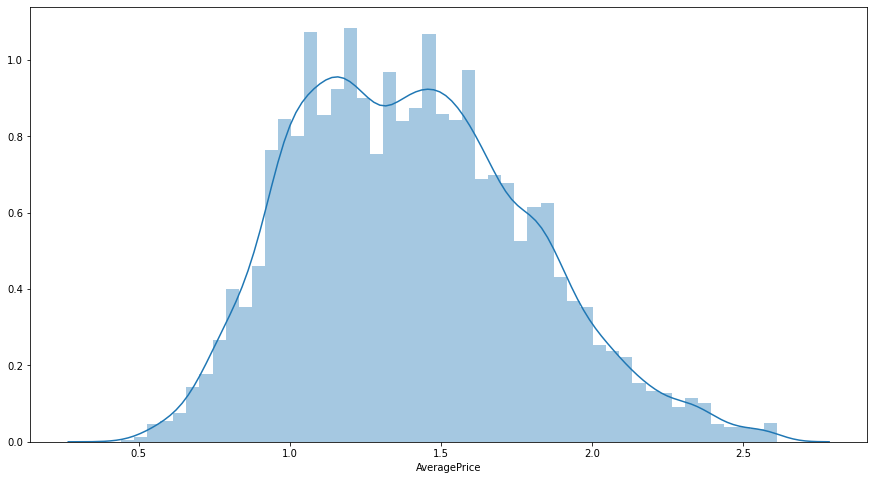

In [40]:
plt.figure(figsize=(15,8))
sns.distplot(df['AveragePrice'])

### Checking Skewness

In [41]:
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

There is skewness in the dataset.Now we have to remove it using power_transform function.since redion and type are categorical variables,we dont consider them as skewed.

### Removing Skewness

In [42]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [43]:
df_new.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
dtype: float64

In [44]:
x=df_new

In [45]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,1.543838
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,1.543838
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,1.543838
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,1.543838


In [46]:
x.shape

(18249, 11)

## Scaling using Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [49]:
x

array([[-0.08660524, -0.65861896,  0.30731294, ..., -0.99983562,
        -1.22187884, -2.01155231],
       [-0.15574567, -0.77686953,  0.23164739, ..., -0.99983562,
        -1.22187884, -2.01155231],
       [ 0.17932662, -0.73194656,  0.57950332, ..., -0.99983562,
        -1.22187884, -2.01155231],
       ...,
       [-0.77150535, -0.61983119, -0.77249619, ...,  1.00016441,
         1.96856389,  1.54383806],
       [-0.69807719, -0.55028196, -0.71054316, ...,  1.00016441,
         1.96856389,  1.54383806],
       [-0.66380937, -0.36790819, -0.78517306, ...,  1.00016441,
         1.96856389,  1.54383806]])

## Finding Best Random State

In [50]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    
    print(f"At random state {i},the testing accuracy is:-  {r2_score(y_test,pred_test)}")

At random state 1,the testing accuracy is:-  0.529022811217436
At random state 2,the testing accuracy is:-  0.5162906070371096
At random state 3,the testing accuracy is:-  0.5372560920336995
At random state 4,the testing accuracy is:-  0.5221993344454603
At random state 5,the testing accuracy is:-  0.5232515282654546
At random state 6,the testing accuracy is:-  0.5411495352229626
At random state 7,the testing accuracy is:-  0.5238387141004682
At random state 8,the testing accuracy is:-  0.5306273733801827
At random state 9,the testing accuracy is:-  0.5188083185808463
At random state 10,the testing accuracy is:-  0.5383444604710867
At random state 11,the testing accuracy is:-  0.5250470066900712
At random state 12,the testing accuracy is:-  0.5298245352906892
At random state 13,the testing accuracy is:-  0.5308872312125495
At random state 14,the testing accuracy is:-  0.5345670309354216
At random state 15,the testing accuracy is:-  0.5264132487068189
At random state 16,the testing accu

Best Random State: 233

In [51]:
x_train.shape

(12774, 11)

In [52]:
x_test.shape

(5475, 11)

In [53]:
y_train.shape

(12774,)

In [54]:
y_test.shape

(5475,)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=233)

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
pred_test=lr.predict(x_test)

In [58]:
print(r2_score(y_test,pred_test))

0.5486423354070185


In [59]:
print('Predicted value and Actual value',pred_test,y_test)

Predicted value and Actual value [1.28706954 1.47751152 1.48744417 ... 1.9828237  1.76863646 1.13884831] 13342    1.55
16432    1.47
13516    1.47
605      0.75
11959    1.53
         ... 
12364    2.07
8366     0.77
14013    2.41
11976    1.79
6610     0.83
Name: AveragePrice, Length: 5475, dtype: float64


In [60]:
print("Error")

print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))

Error
Mean squared error: 0.07671372362560051
Mean absolute error: 0.21423837104278812


## Fitting Nonlinear Models

In [61]:
model=[DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]

In [62]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('Accuracy score:',r2_score(y_test,predm))
    print('mse:',mean_squared_error(y_test,predm))
    print('mae:',mean_absolute_error(y_test,predm))
    print('\n')

For LinearRegression() :
Accuracy score: 0.5486423354070185
mse: 0.07671372362560051
mae: 0.21423837104278812


For DecisionTreeRegressor() :
Accuracy score: 0.7058213848044474
mse: 0.04999923287671233
mae: 0.1456511415525114


For SVR() :
Accuracy score: 0.717122581569984
mse: 0.04807845706338547
mae: 0.16019670274134684


For KNeighborsRegressor() :
Accuracy score: 0.8331296361400332
mse: 0.028361647488584472
mae: 0.11685296803652968


For RandomForestRegressor() :
Accuracy score: 0.8551222209982168
mse: 0.02462374026118721
mae: 0.10899242009132419


For GradientBoostingRegressor() :
Accuracy score: 0.6925585316648905
mse: 0.052253416044627285
mae: 0.17100157875948654




## Cross validation

In [61]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]

In [63]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('For',m,':')
    print('Score:',score)
    print('Cross Validation Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('\n')

For LinearRegression() :
Score: [0.02774813 0.1059727  0.48257637 0.1868755  0.20747492]
Cross Validation Score: 0.20212952570882187
Standard Deviation: 0.1539913609002078


For DecisionTreeRegressor() :
Score: [-1.20836155 -0.39717435  0.14646035 -1.05465514 -0.33616799]
Cross Validation Score: -0.5699797339793976
Standard Deviation: 0.4980477117560013


For SVR() :
Score: [-0.63827998  0.30075681  0.15201221  0.3323245  -0.00923598]
Cross Validation Score: 0.027515511056342267
Standard Deviation: 0.3543171074350913


For KNeighborsRegressor() :
Score: [-0.12555919  0.25359053  0.44432349  0.19047364 -0.14425034]
Cross Validation Score: 0.12371562594602677
Standard Deviation: 0.22718152130009048


For RandomForestRegressor() :
Score: [0.17169432 0.28911136 0.50630787 0.05528523 0.03071858]
Cross Validation Score: 0.2106234717518579
Standard Deviation: 0.1741268673978201


For GradientBoostingRegressor() :
Score: [0.2475251  0.37061361 0.59811951 0.26321076 0.12696212]
Cross Validation

#### Standard deviation is minimum for the model "GradientBoostingRegressor".So this is our best model.

## Regularization

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':range(0,10)}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_) 

{'alpha': 0.0001, 'random_state': 0}


In [66]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5485882450477251

In [67]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
print('cross validation score',cv_mean)

cross validation score 0.20200736336465316


## Hyper Parameter Tuning

In [68]:
#Creating parameter list to pass in GridSearchCV
parameter={'criterion':['mse','mae'],'max_depth':[1,10],'n_estimators':[1,100],'max_features':['auto','sqrt','log2']}

In [69]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': range(0, 10)})

In [71]:
GCV.best_params_

{'alpha': 0.0001, 'random_state': 5}

In [72]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [75]:
r2_score(y_test,GCV_pred)

0.6925585316648906

## Saving the Best Model

In [76]:
import pickle
filename='Avocado.pkl'
pickle.dump(GCV.best_estimator_,open('avocado.pkl','wb'))

## Conclusion

In [77]:
loaded_model=pickle.load(open('avocado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.6925585316648906


In [78]:
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [79]:
df_con

,Original,Predicted
0,1.55,1.330178
1,1.47,1.559197
2,1.47,1.606211
3,0.75,0.795860
4,1.53,1.632568
...,...,...
5470,2.07,1.784258
5471,0.77,1.133062
5472,2.41,1.969751
5473,1.79,1.690981


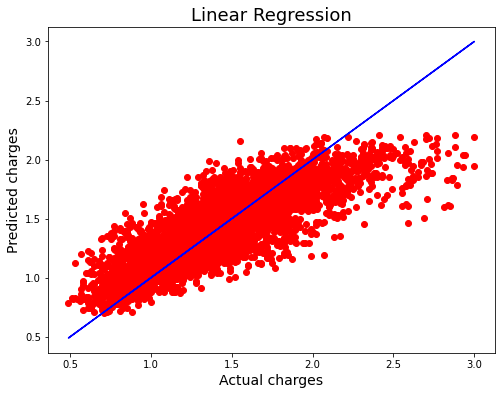

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=GCV_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()